### **Loading the necessary libraries...**

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### **Loading Images...**

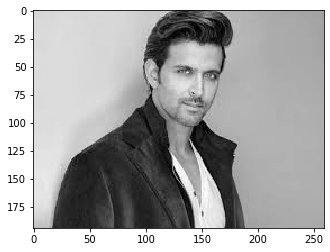

In [3]:
#Loading the images to be tested
test_image= cv2.imread('/content/image.jfif')

#Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray= cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

#Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

Since we know that OpenCV loads an image in BGR format so we need to convert it into RBG format to be able to display its true colours.

In [0]:
def convertToRGB(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# **Haar cascade files**

OpenCV comes with a lot of pre-trained classifiers. For instance there are classifiers for smile, eyes, face, etc. These come in the form of xml files.

**Loading the classifier for frontal face.**

In [0]:
haar_cascade_face= cv2.CascadeClassifier('/content/haarcascade_frontalface_alt2.xml')

# **Face Detection**

We shall be using the detectMultiscale module of the classifier. This function will return the co-ordinates (x and y position plus the height and width) of the detected faces as Rect(x,y,w,h)

In [8]:
faces_rects= haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor= 1.2, minNeighbors= 5)

#Let us print the no. of faces found...
print('Faces found: ', len(faces_rects))

Faces found:  1


Our next step is to loop over all the co-ordinates it returned and draw rectangles around them using OpenCV. We will be drawing a green rectangle with thickness of 2.

In [0]:
for (x,y,w,h) in faces_rects:
  cv2.rectangle(test_image, (x,y), (x+w, y+h), (0,255,0), 2)

Finally we shall the display the original image in coloured to see if the face has been detected or not.

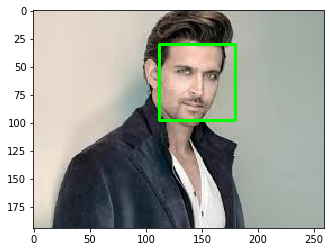

In [11]:
#convert image to RGB and show image.
plt.imshow(convertToRGB(test_image))

**Let us create a generalised function for entire face detection process...**

In [0]:
def detect_faces(cascade, test_image, scaleFactor=1.1):
  #create a copy of the image to prevent any changes to the original one.
  image_copy= test_image.copy()

  #convert the test image to grey scale image as OpenCV face detector expects grey scale image.
  gray_image= cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

  #applying the haar classifier to detect faces
  faces_rects= cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

  for (x,y,w,h) in faces_rects:
    cv2.rectangle(image_copy, (x,y), (x+w, y+h), (0,255,0), 3)

  return image_copy

**Testing the function on new image..**

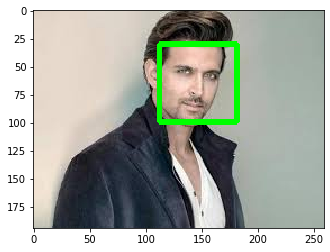

In [18]:
#Loading the image...
test_image2= cv2.imread('/content/image.jfif')

#call the function to detect the faces..
faces= detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image..
plt.imshow(convertToRGB(faces))

**Testing the function on a group photograph..**

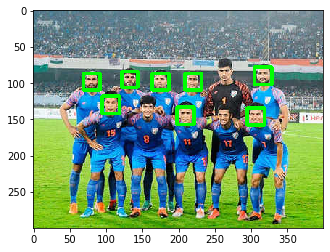

In [21]:
#Load the image..
test_image3= cv2.imread('/content/Football.jpg')

#Call the function to detect the faces..
faces= detect_faces(haar_cascade_face, test_image3)

#convert to RGB and display image..
plt.imshow(convertToRGB(faces))

**Saving the image.**

In [22]:
cv2.imwrite('ImageSaved.png', faces)

True